# Notebook to generate a dataframe that captures data reliability

Perform a series of tests/questions on each row and score the result based on 0 (missing), 1 (ambiguous), 2 (present)
- is the plot number recorded? If not, this makes it very difficult to identify the plot as unique vs others (2 if different from 1.2)
- is the type of property recorded? Very difficult to interpret the results if we don’t know this
- does the plot have a zone? (Other means ambiguous)
- does the plot have a zone section?
- does the plot have toilets (sum should not include disused)
- does the plot receive water?
- who is the respondent (2 for landlord, 1 for caretaker and tenant, 0 for unknown)
- was gps info captured?)
- does the number of users sum up to the initial value
- do they know where they dispose of solid wastes?
- do they know if the toilet has been upgraded- no not reliable if they haven’t been there 2 years
- Do they know they age of toilet?
- Do they give age of toilet if more than 1
- Do they know if the toilet has been emptied?
- Do they know how much they spent?
- Do they know how often they empty it?
- Do they give a value for emptying it but have never actually emptied it
- Is the toilet accessible but has never been emptied?
- Is property recorded as not residential but a tenant answering questions
- Toilet is not feasible for emptying but they have

## List of possible inconsistencies that people have mentioned (excluding geospatial which are being dealt with separately
 - visit information
      - length of time of responder on plot - if units is not a number
      - weird time of visit
 - plot types
     - no Record plot number
     - record plot numbers are not equal
     - zone and gps don't correspond
     - number of families on the plot
     - number of people on plot
     - people living on the plot vs toilet users
 - toilet types
    - no toilets

In [2]:
import pandas as pd

In [3]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300
pd.options.display.max_colwidth = 300

In [4]:
results = pd.read_hdf('../data/wsup/tidy/data_tidied.h5', key='resuts')

# Summary results

### Proportion of fields with glowing results

In [5]:
results[results.mean(axis=1)==2].shape[0] / results.shape[0]

0.018004722550177096

### Spread of average scores

In [6]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.4)

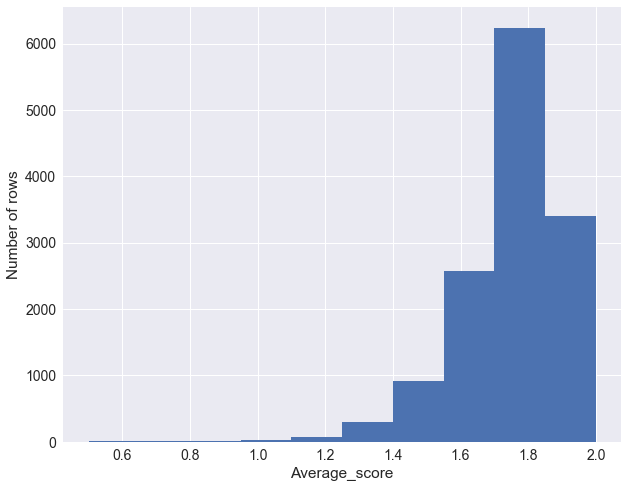

In [7]:
g = results.mean(axis=1).hist(figsize=(10,8))
g.set_xlabel('Average_score')
g.set_ylabel('Number of rows')

# Scores by field

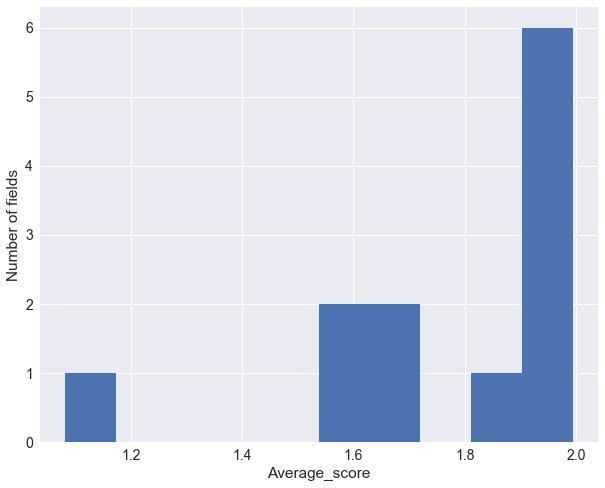

In [8]:
g = results.mean(axis=0).hist(figsize=(10,8))
g.set_xlabel('Average_score')
g.set_ylabel('Number of fields')

In [9]:
results.mean(axis=0).sort_values(ascending=False)

Property_type                 1.993875
Solid waste                   1.973140
Water_collection              1.952701
People_household              1.947060
Toilets_total                 1.945691
Toilet_details                1.937205
GPS_presence                  1.850649
Property_zone                 1.668979
Plot_id                       1.659903
Respondent_type               1.562057
People_numbers_consistency    1.540142
Age_of_toilet_reliability     1.082645
dtype: float64